In [114]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.core.display import display
%matplotlib inline
import yfinance as yf

#import historical data from yahoo api
df = yf.download("EURUSD=X", start="2017-01-01", end="2020-01-01")
df = df.assign(Date = df.index.values)
index = list(range(len(df)))
df.index = index

[*********************100%***********************]  1 of 1 completed
         Open      High       Low     Close  Adj Close  Volume       Date
0    1.053075  1.054074  1.046572  1.052698   1.052698       0 2017-01-02
1    1.045916  1.049208  1.034768  1.046003   1.046003       0 2017-01-03
2    1.041840  1.047889  1.039134  1.041992   1.041992       0 2017-01-04
3    1.049869  1.060895  1.048658  1.050089   1.050089       0 2017-01-05
4    1.060558  1.060895  1.053963  1.060592   1.060592       0 2017-01-06
..        ...       ...       ...       ...        ...     ...        ...
774  1.109139  1.110864  1.107788  1.109016   1.109016       0 2019-12-25
775  1.109509  1.110494  1.108279  1.109545   1.109545       0 2019-12-26
776  1.110124  1.118068  1.110000  1.110112   1.110112       0 2019-12-27
777  1.118155  1.122070  1.118155  1.118230   1.118230       0 2019-12-30
778  1.120448  1.124101  1.120072  1.120230   1.120230       0 2019-12-31

[779 rows x 7 columns]


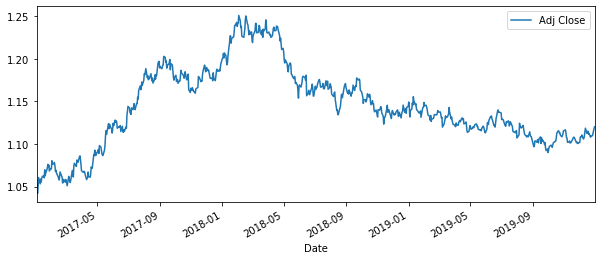

In [115]:
df.plot(x='Date', y='Adj Close', figsize=(10,4))

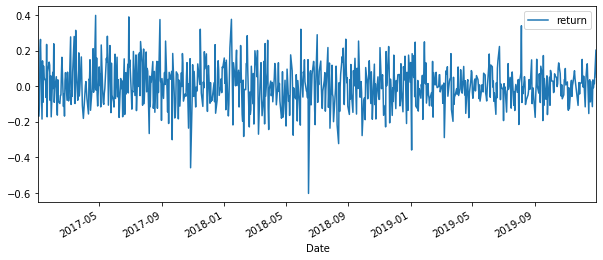

In [116]:
# Normalize Adj Close value
# We use this value to train model

df['return'] = df['Adj Close'] - df['Adj Close'].shift(1)
df['return'] = df['return'] / (df['return'].max() - df['return'].min())

df.plot(x='Date', y='return', figsize=(10,4))

In [117]:
# Make label, 1 as rising price, 0 as falling price

df['label'] = df['return'].apply(lambda x: 1 if x>0.0 else 0)
# df.dropna(inplace=True)
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Date,return,label
774,1.109139,1.110864,1.107788,1.109016,1.109016,0,2019-12-25,-0.009221,0
775,1.109509,1.110494,1.108279,1.109545,1.109545,0,2019-12-26,0.013222,1
776,1.110124,1.118068,1.110000,1.110112,1.110112,0,2019-12-27,0.014154,1
777,1.118155,1.122070,1.118155,1.118230,1.118230,0,2019-12-30,0.202844,1
778,1.120448,1.124101,1.120072,1.120230,1.120230,0,2019-12-31,0.049952,1


In [118]:
# Make training dataset
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['label']), df['label'].to_frame(), test_size=0.33, random_state=42)

print('%% of Class0 : %f' % (np.count_nonzero(y_train == 0)/float(len(y_train))))
print('%% of Class1 : %f' % (np.count_nonzero(y_train == 1)/float(len(y_train))))

% of Class0 : 0.499040
% of Class1 : 0.500960


In [120]:
from sklearn import metrics, tree
from sklearn.ensemble import GradientBoostingClassifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

#y_predict = model.predict(X_test)
#print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

TypeError: invalid type promotion